In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Enable inline plotting in Jupyter Notebook
%matplotlib inline


In [8]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame  # Access data as a pandas DataFrame

# Display basic info and preview of the dataset
print(data.info())    # Check for missing values and data types
print(data.head())    # Preview the first few rows

# Description of dataset
print(data.describe())  # Statistical summary of numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

In [9]:
# Split the dataset into features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features: All except the target column
y = data['MedHouseVal']              # Target: Median House Value

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


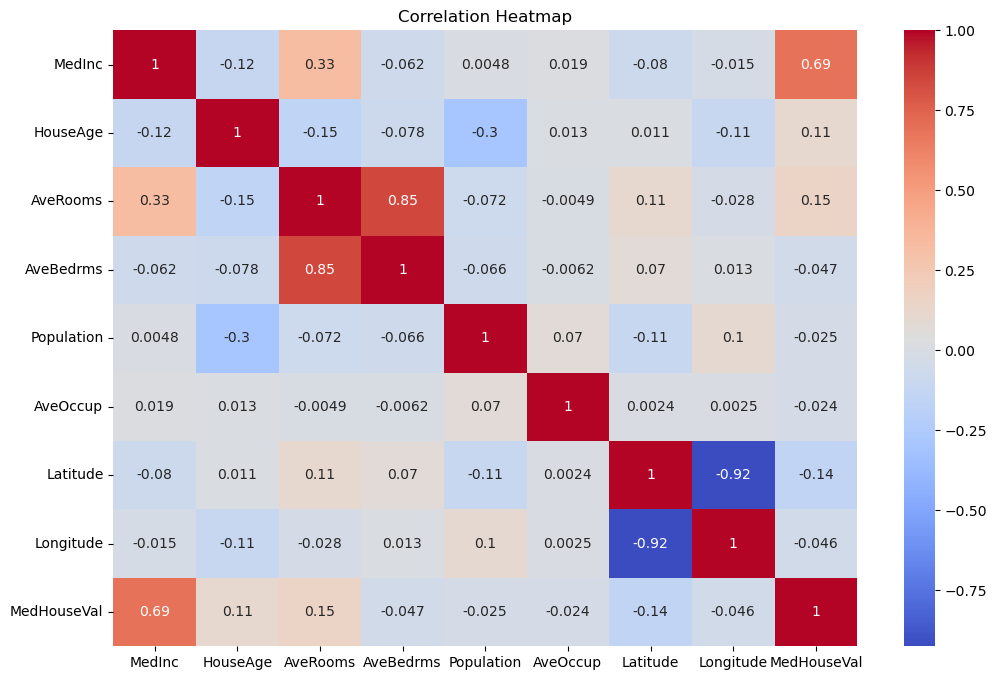

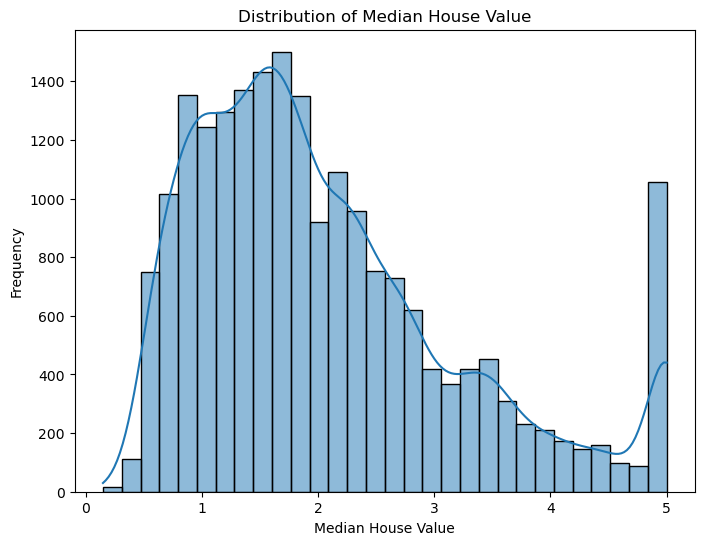

In [11]:
# Correlation heatmap to understand feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")


Linear Regression Performance:
RMSE: 0.75
MAE: 0.53
R²: 0.58


In [9]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Split features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# Transform features to include polynomial terms (degree 2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate the Polynomial Regression model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Performance (Degree 2):")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"R²: {r2_poly:.2f}")
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


NameError: name 'LinearRegression' is not defined

In [ ]:
# Scatter plot for Linear Regression

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Scatter plot for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='green', label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Polynomial Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [ ]:
#compare model performances
# Create a performance summary table
performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'RMSE': [rmse_lr, rmse_poly],
    'MAE': [mae_lr, mae_poly],
    'R²': [r2_lr, r2_poly]
})

print("Model Performance Comparison:")
print(performance)

# Visualize the comparison
performance.set_index('Model', inplace=True)
performance[['RMSE', 'MAE']].plot(kind='bar', figsize=(12, 6), rot=0, colormap='viridis')
plt.title("Model Comparison")
plt.ylabel("Error")
plt.show()


In [ ]:
# Save the performance metrics to a CSV file
performance.to_csv("model_performance_comparison.csv", index=True)
print("Model performance comparison saved to 'model_performance_comparison.csv'")


In [13]:
echo "# Regression-project" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/rimshaahma/Regression-project.git
git push -u origin main

SyntaxError: invalid syntax (3449042781.py, line 1)